# **Lab 3 : Lagrangian Interpolation**<br>

Interpolation is the process of estimating unknown data that lies within the range of some known data. The **Lagrangian Interpolation** is one of the methods of performing this task. In order to interpolate unknown data, one needs to define a model that would fit the known data and based on that model, one would obtain the unknown data. This model would basically be a function that tries to satisfy the known data points. There can be various types of functions that may satisfy the same given data points, but for interpolation, we usually choose **polynomials** as interpolating functions due to the fact that polynomials are very easy to evaluate, differentiate and integrate.

In today's lab, we will be implementing the **Lagrangian Interpolation** in python. To test our implementation, we will be using the same data that we used during our class lectures. Run the following cell to load the known data points:
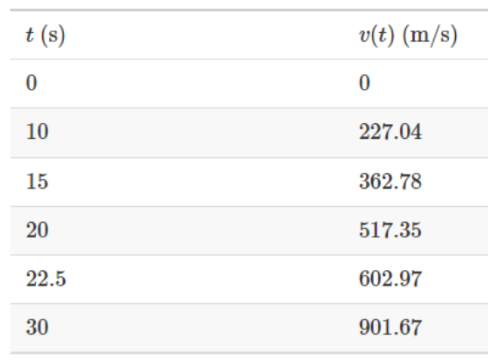

Run the following cell to load the known data points $-$ $\{(t_0, v(t_0)), (t_1, v(t_1)), \dots, (t_5, v(t_5))\}$.

In [1]:
t = [0, 10, 15, 20, 22.5, 30]
v = [0, 227.04, 362.78, 517.35, 602.97, 901.67]

**Note:** If you can implement the $O(n\text{log}^2n)$ algorithm, then you'll receive a lot of ***bonus marks***.
<br>
Codeforces blog on optimizing Lagrangian Interpolation: https://codeforces.com/blog/entry/94143

##Task 1
Design a utility function that will be called in the `Lagrangian` function. The purpose of this function will be to find the $n+1$ closest points to the unknown value $t_{new}$ that also bracket the $t_{new}$ value. Here, $t_{new}$ is where we want to interpolate the data, where $n$ is the order of the interpolating polynomial. Understand that the nearest points should be selected such that they bracket the $t_{new}$.

**Note:** Make sure your nearest points also ***bracket*** the $t_{new}$ point.

The function to be implemented is as follows:

In [13]:
def NearestPoints(t, v, n, t_new):
    left=0
    right=len(t)-1
    closest_index = -1
    min_difference = float('inf')

    t_nearest = []
    v_nearest = []


    while left<= right:
        mid=(left+right)//2
        difference = abs(t[mid]- t_new)

        if difference < min_difference:
            min_difference = difference
            closest_index = mid

        if t[mid]< t_new:
            left=mid+1
        else:
            right=mid-1


    t_nearest.append(t[closest_index])
    v_nearest.append(v[closest_index])

    left_index = closest_index -1
    right_index = closest_index +1

    if n > 0:
      if t[closest_index] < t_new:
       t_nearest.append(t[right_index])
       v_nearest.append(v[right_index])
       right_index += 1
      else:
       t_nearest.append(t[left_index])
       v_nearest.append(v[left_index])
       left_index -= 1


    while len(t_nearest) <= n:
      if left_index >=0 and right_index <len(t):
        if abs(t[left_index]-t_new) <= abs(t[right_index]-t_new):
         t_nearest.append(t[left_index])
         v_nearest.append(v[left_index])
         left_index -= 1

        else:
          t_nearest.append(t[right_index])
          v_nearest.append(v[right_index])
          right_index += 1
      elif left_index >=0:
        t_nearest.append(t[left_index])
        v_nearest.append(v[left_index])
        left_index -= 1
      elif right_index <len(t):
        t_nearest.append(t[right_index])
        v_nearest.append(v[right_index])
        right_index += 1



    return t_nearest, v_nearest

The above function is supposed to return two vectors, say `t_nearest` and `v_nearest` consisting of $n+1$ elements each. For testing how the function works, we can print the data and see what we are getting. If our implementation is correct, then we should be getting $[15], [362.78]$ for $n=0$. Run the following cell to check this:

In [14]:
n = 0
t_new = 16

t_nearest, v_nearest = NearestPoints(t, v, n, t_new)
print(t_nearest)
print(v_nearest)

[15]
[362.78]


In [15]:
n = 1
t_new = 16

t_nearest, v_nearest = NearestPoints(t, v, n, t_new)
print(t_nearest)
print(v_nearest)

[15, 20]
[362.78, 517.35]


The output for $n=1$ should be $[15, 20], [362.78, 517.35]$

In [16]:
n = 2
t_new = 16

t_nearest, v_nearest = NearestPoints(t, v, n, t_new)
print(t_nearest)
print(v_nearest)

[15, 20, 10]
[362.78, 517.35, 227.04]


The output for $n=2$ should be $[15, 20, 10], [362.78, 517.35, 227.04]$

Try out the following test cases to ensure whether your `NearestPoints` function is actually **bracketing** the unknown point `t_new` or not.

In [17]:
t_edge = [0, 10, 15, 20, 22.5, 31]
v_edge = [0, 227.04, 362.78, 517.35, 602.97, 911.69]
n = 2
t_new = 22.51

t_nearest, v_nearest = NearestPoints(t_edge, v_edge, n, t_new)
print(t_nearest)
print(v_nearest)

[22.5, 31, 20]
[602.97, 911.69, 517.35]


The output for this test case should be $[20, 22.5, 31], [517.35, 602.97, 911.69]$.

In [18]:
t_edge = [0, 10, 11, 12, 22.5, 31]
v_edge = [0, 227.04, 362.78, 517.35, 602.97, 911.69]
n = 2
t_new = 9.420

t_nearest, v_nearest = NearestPoints(t_edge, v_edge, n, t_new)
print(t_nearest)
print(v_nearest)

[10, 0, 11]
[227.04, 0, 362.78]


The output for this test case should be $[0, 10, 11], [0, 227.04, 362.78]$.

##Task 2
Now your task is to design a generalized function that takes the given data as parameters as well as the order $n$ of the polynomial and uses the Lagrangian Polynomial to interpolate the unknown data at $t_{new}$. The function should return the array of the Lagrangian constants $L_0, L_1$ and so on. The following cell contains the function to be implemented:

In [19]:
def Lagrangian(t_nearest, v_nearest, n, t_new):
    L = []
    i=0

    while i<=n:
      val=1
      j=0
      while j<=n:
        if i!=j:
          val*=(t_new-t_nearest[j])/(t_nearest[i]-t_nearest[j])
        j+=1
      L.append(val)
      i+=1

    return L

Note that the above function will at first need to find a number of closest points to the unknown data $t_{new}$, and this number will vary depending on the order $n$ of the polynomial that we want to use as the interpolating function. So you will have to call the `NearestPoints` function you implemented in **Task 1** inside this function. The Lagrangian constants returned by the previous function would be used by another function that evaluates the results of the unknown data based on the Lagrangian constants. For that, implement the following function:

In [20]:
def evalLagrangian(L, v_nearest):
    products= []
    i=0

    while i<len(L):
      products.append(L[i]*v_nearest[i])
      i+=1

    res=sum(products)
    return res

In [21]:
t_nearest, v_nearest = NearestPoints(t, v, 1, 16)
print(evalLagrangian(Lagrangian(t_nearest, v_nearest, 1, 16), v_nearest))

393.694


For $n=1$, we should get $v(16) \approx 393.7ms^{-1}$.

In [22]:
t_nearest, v_nearest = NearestPoints(t, v, 2, 16)
print(evalLagrangian(Lagrangian(t_nearest, v_nearest, 2, 16), v_nearest))

392.1875999999999


For $n=2$, we should get $v(16) \approx 392.19ms^{-1}$.

In [23]:
t_nearest, v_nearest = NearestPoints(t, v, 3, 16)
print(evalLagrangian(Lagrangian(t_nearest, v_nearest, 3, 16), v_nearest))

392.057168


For $n=3$, we should get $v(16) \approx 392.06ms^{-1}$.

##Task 3
Now, test the function using different order of polynomials, setting $n = 1, 2, 3$ and so on, and print the Relative Approximate Error $|\epsilon_a|\%$ at each step. Also generate a plot of Order $(n)$ vs Relative Approximate Error $(|\epsilon_a|\%)$.

Since you have at most $6$ datapoints $-$ $\{(t_0, v(t_0)), (t_1, v(t_1)), \dots, (t_5, v(t_5))\}$, you can have an interpolant of highest order $n=5$.

In case you do not remember how graphs can be plotted in Python, here is a sample code showing how to do it using the `matplotlib` library.

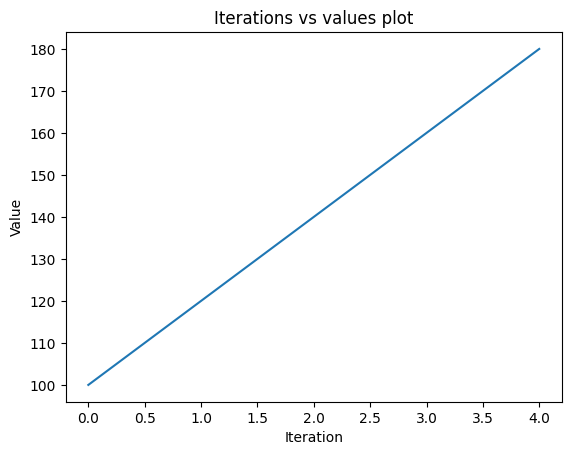

In [25]:
import numpy as np
import matplotlib.pyplot as plt

iters = np.arange(0, 5) #start=0, stop=5, and since no step is given, so default step=1
vals = np.arange(100, 200, 20) #start=100, stop=200, step=20

plt.plot(iters, vals)
plt.title("Iterations vs values plot")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.show()

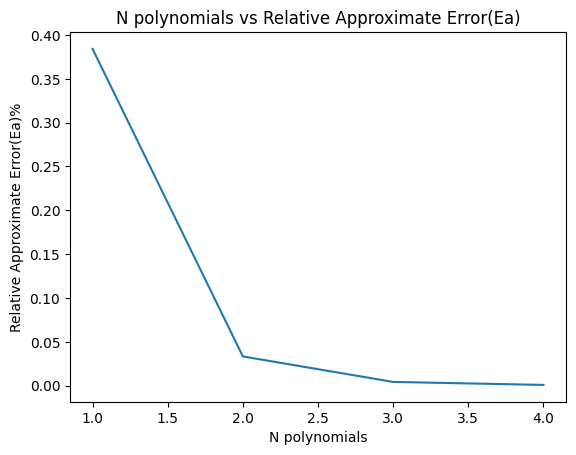

In [26]:
def graph_plotting_Ea(t, v, t_new, max):
    approx_values= []
    errors= []

    n=1
    while n<=max:
        t_nearest, v_nearest = NearestPoints(t, v, n, t_new)

        L = Lagrangian(t_nearest, v_nearest, n, t_new)
        approx = evalLagrangian(L, v_nearest)
        approx_values.append(approx)
        n+= 1

    i = 1
    while i < len(approx_values):
        ea = abs((approx_values[i] - approx_values[i-1]) / approx_values[i]) * 100
        errors.append(ea)
        i += 1

    return errors

t_new = 16
max = 5

errors = graph_plotting_Ea(t,v,t_new,max)
orders = np.arange(1,max)

plt.plot(orders,errors)
plt.title("N polynomials vs Relative Approximate Error(Ea)")
plt.xlabel("N polynomials")
plt.ylabel("Relative Approximate Error(Ea)%")
plt.show()


Your graph should look something like,
<br>
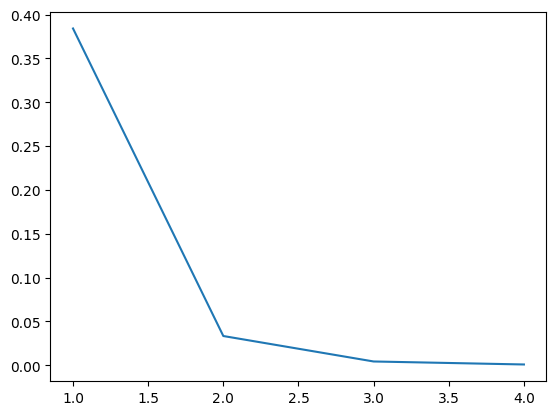